In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.corpus import  stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Malignant_train.CSV
train=pd.read_csv('Malignant_train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
# Loading Malignant_test.csv
test=pd.read_csv('Malignant_test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
# Id is not gonna help to predict anything, So dropping it.
train.drop(['id'],axis=1,inplace=True)

In [7]:
# length contains length of the  features
train['length']=train.comment_text.str.len()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [8]:
# Replace email address with 'email'
train['comment_text']=train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#ReplaceURLs with 'webaddress'
train['comment_text']=train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
train['comment_text']=train['comment_text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone number 
train['comment_text']=train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
                                                
#Replace numbers with 'numbr'
train['comment_text']=train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove Punctuation 
train['comment_text']=train['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replace Whitspace between terms with  a single space
train['comment_text']=train['comment_text'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
train['comment_text']=train['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [9]:
# Replace email address with 'email'
test['comment_text']=test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#ReplaceURLs with 'webaddress'
test['comment_text']=test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
test['comment_text']=test['comment_text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone number 
test['comment_text']=test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
                                                
#Replace numbers with 'numbr'
test['comment_text']=test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove Punctuation 
test['comment_text']=test['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replace Whitspace between terms with  a single space
test['comment_text']=test['comment_text'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
test['comment_text']=test['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [10]:
#Removing Stopwords from train dataset
stop_words = set(stopwords.words('english') +['u','ur','4','2','im','dont','doin','I','numbr','YOU','You','A','If','one','The','page','would','article','talk','like','know','THE','people','get'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [11]:
#Remove Stopwords from test dataset
stop_words = set(stopwords.words('english') +['u','ur','4','2','im','dont','doin','I','numbr','YOU','You','A','If','one','The','page','would','article','talk','like','know','THE','people','get'])
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [12]:
# checking the comments content..
train["comment_text"]

0         Explanation Why edits made username Hardcore M...
1         D aww He matches background colour seemingly s...
2         Hey man really trying edit war It guy constant...
3         More make real suggestions improvement wondere...
4                              sir hero Any chance remember
                                ...                        
159566    And second time asking view completely contrad...
159567                      ashamed That horrible thing put
159568    Spitzer Umm theres actual prostitution ring Cr...
159569    And looks actually put speedy first version de...
159570    And really think understand came idea bad righ...
Name: comment_text, Length: 159571, dtype: object

In [13]:
# Clean_length contains length of the clean_comment_text feature after puncuations, stopwords removal
train['Clean_length'] = train.comment_text.str.len()
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,Clean_length
0,Explanation Why edits made username Hardcore M...,0,0,0,0,0,0,264,161
1,D aww He matches background colour seemingly s...,0,0,0,0,0,0,112,69
2,Hey man really trying edit war It guy constant...,0,0,0,0,0,0,233,137
3,More make real suggestions improvement wondere...,0,0,0,0,0,0,622,379
4,sir hero Any chance remember,0,0,0,0,0,0,67,28


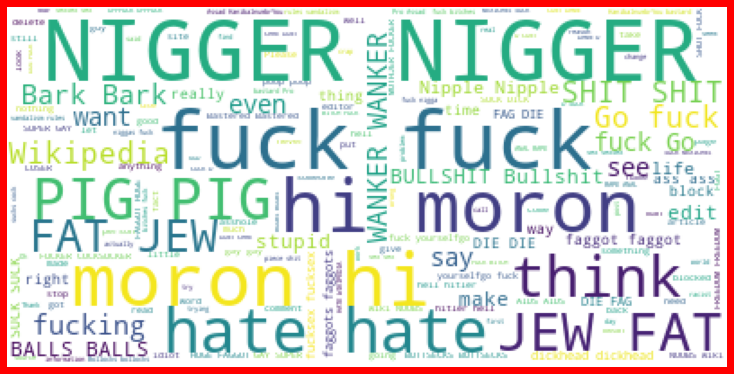

In [14]:
#getting sense of loud words in Comments which are  marked as Malignant
from wordcloud import WordCloud

sp = train['comment_text'][train['malignant']==1]
sp_cloud =WordCloud(mode='RGBA', background_color='rgba(255, 255, 255, 255)').generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

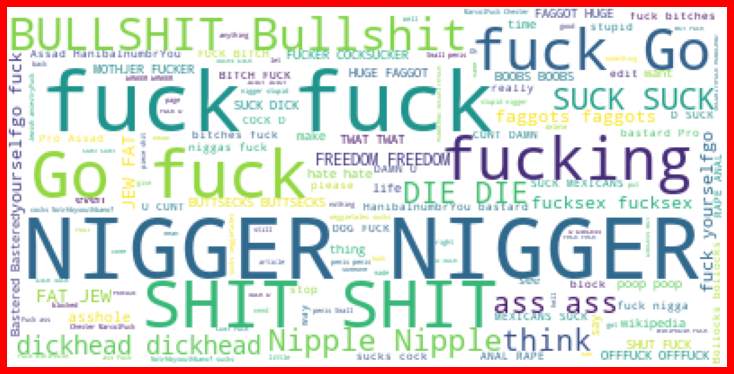

In [15]:
#getting sense of loud words in Comments which are marked as rude.
sp = train['comment_text'][train['rude']==1]
sp_cloud =WordCloud(mode='RGBA', background_color='rgba(255, 255, 255, 255)').generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

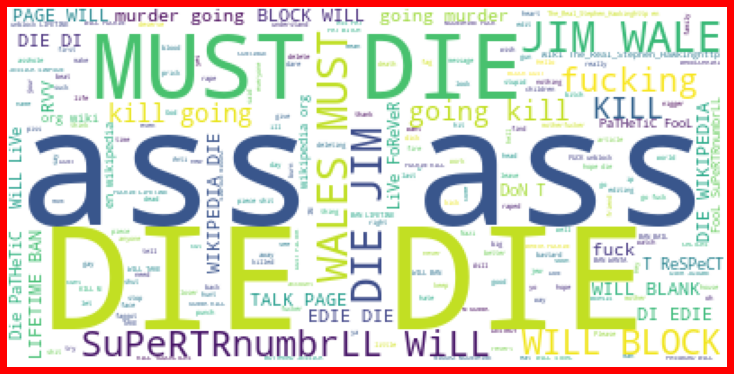

In [16]:
#getting sense of loud words in Comments which are marked as threat.
sp = train['comment_text'][train['threat']==1]
sp_cloud =WordCloud(mode='RGBA', background_color='rgba(255, 255, 255, 255)').generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

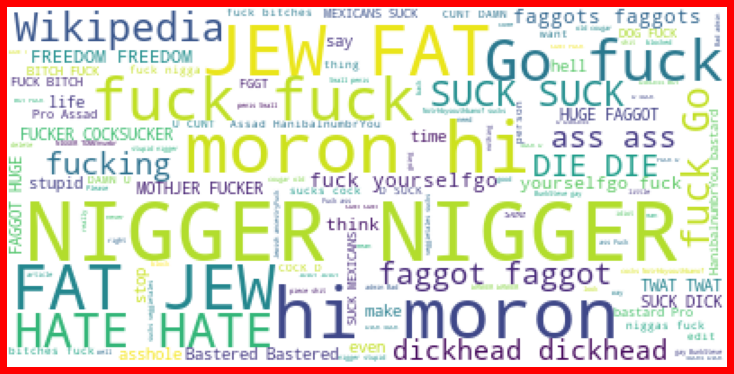

In [17]:
#getting sense of loud words in Comments which are marked as abuse.
sp = train['comment_text'][train['abuse']==1]
sp_cloud =WordCloud(mode='RGBA', background_color='rgba(255, 255, 255, 255)').generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

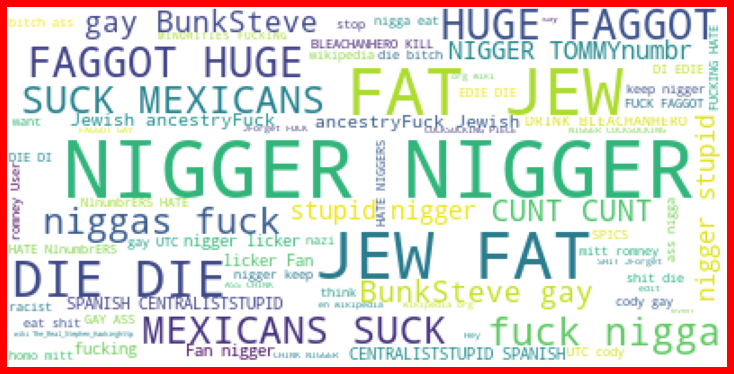

In [18]:
#getting sense of loud words in Comments which are marked as loathe.
sp = train['comment_text'][train['loathe']==1]
sp_cloud =WordCloud(mode='RGBA', background_color='rgba(255, 255, 255, 255)').generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

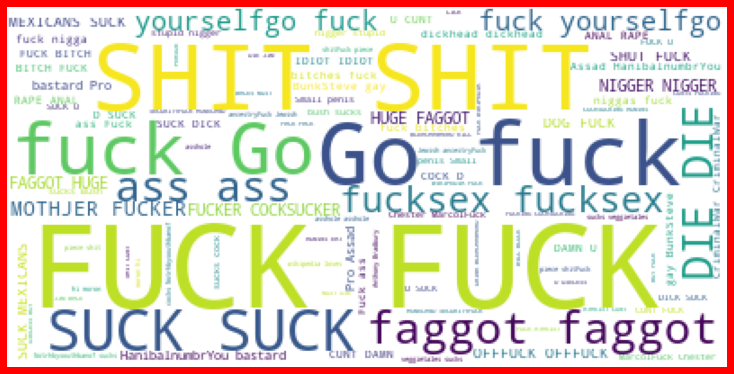

In [19]:
#getting sense of loud words in Comments which are marked as highly_malignant.
sp = train['comment_text'][train['highly_malignant']==1]
sp_cloud =WordCloud(mode='RGBA', background_color='rgba(255, 255, 255, 255)').generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

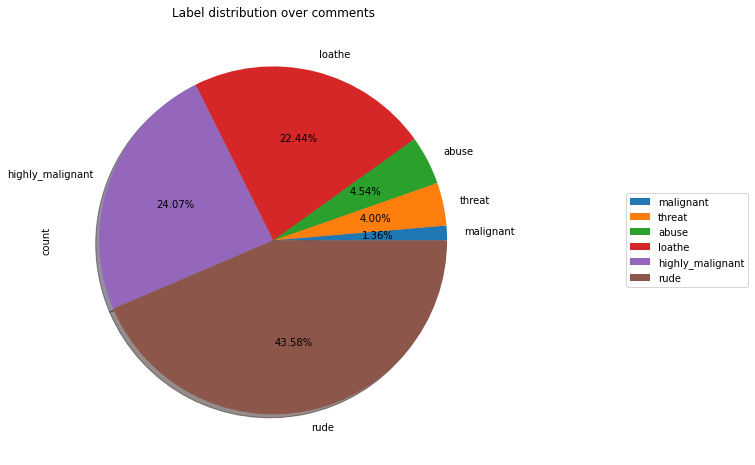

In [20]:
#Pie chart will help us to identify Which kind of commments has more nummber of comments.
cols_target = ['malignant','threat','abuse','loathe','highly_malignant','rude',]
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',shadow=True,labels=cols_target, autopct='%.2f%%',
                                      title='Label distribution over comments',
                                      figsize=(8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [21]:
target_data = train[cols_target]
train['label'] =train[cols_target].sum(axis =1)
print(train['label'].value_counts())
train['label'] = train['label'] > 0 
train['label'] = train['label'].astype(int)
print(train['label'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64
0    143346
1     16225
Name: label, dtype: int64


In [23]:
#for counting frequently occurence of Malignant and not Malignant words.
import pandas as pd
from collections import Counter
count1 = Counter(" ".join(train[train['label']==0]["comment_text"]).split()).most_common(200)
count2 = Counter(" ".join(train[train['label']==1]["comment_text"]).split()).most_common(200)
df=pd.DataFrame()
print("TOP 200 Words in Each Category (Word,Counts)")
df['Malignant Words']=count1
df['Not Malignant Words']=count2
df.head(8)

TOP 200 Words in Each Category (Word,Counts)


,Malignant Words,Not Malignant Words
0,"(Wikipedia, 37384)","(fuck, 4910)"
1,"(It, 21649)","(FUCK, 3533)"
2,"(think, 18394)","(NIGGER, 2428)"
3,"(see, 17724)","(SUCK, 2393)"
4,"(edit, 16428)","(ass, 2282)"
5,"(Please, 16388)","(shit, 2113)"
6,"(This, 15719)","(fucking, 1939)"
7,"(use, 15624)","(moron, 1833)"


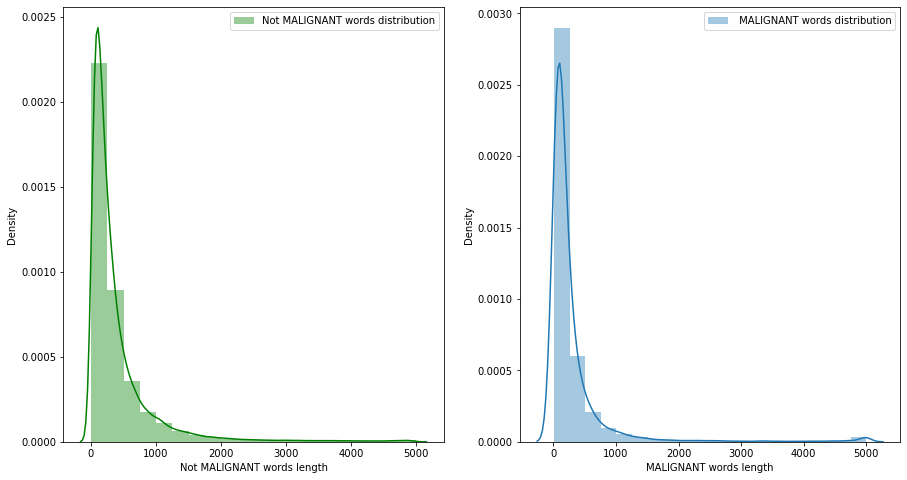

In [24]:
# Comments length distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(train[train['label']==0]['length'],bins=20,ax=ax[0],label='Not MALIGNANT words distribution',color='g')
ax[0].set_xlabel('Not MALIGNANT words length')
ax[0].legend()
sns.distplot(train[train['label']==1]['length'],bins=20,ax=ax[1],label=' MALIGNANT words distribution')
ax[1].set_xlabel('MALIGNANT words length')
ax[1].legend()
plt.show()

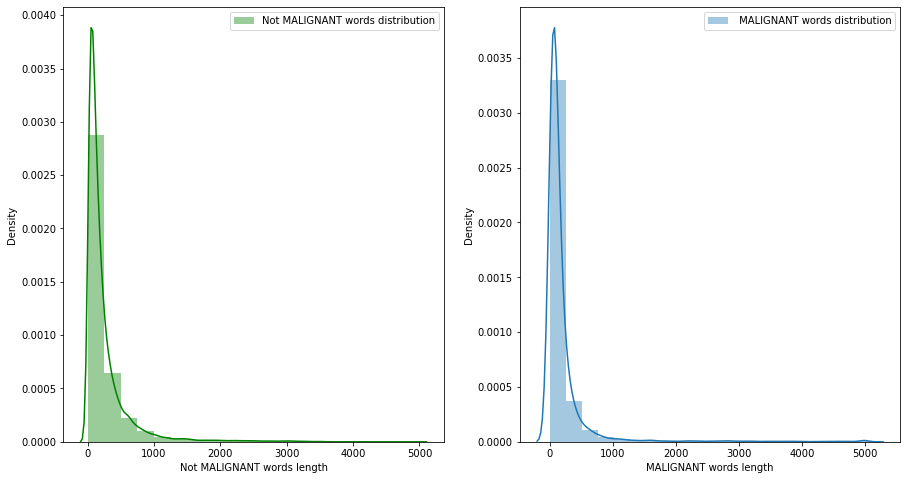

In [25]:
# Comments length distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(train[train['label']==0]['Clean_length'],bins=20,ax=ax[0],label='Not MALIGNANT words distribution',color='g')
ax[0].set_xlabel('Not MALIGNANT words length')
ax[0].legend()
sns.distplot(train[train['label']==1]['Clean_length'],bins=20,ax=ax[1],label=' MALIGNANT words distribution')
ax[1].set_xlabel('MALIGNANT words length')
ax[1].legend()
plt.show()

In [26]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the train documents into vectors so that machine can do further processing
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [27]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf_train(train['comment_text'])

In [28]:
# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

# Assigning the label in y and checking it's shape
y = train['label'].values
print("Shape of y: ",y.shape)

Shape of x:  (159571, 51305)
Shape of y:  (159571,)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, recall_score, classification_report,roc_auc_score,roc_curve,auc
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3)]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)  
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.9551721256684492
[[42809   196]
 [ 1950  2917]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     43005
           1       0.94      0.60      0.73      4867

    accuracy                           0.96     47872
   macro avg       0.95      0.80      0.85     47872
weighted avg       0.95      0.96      0.95     47872

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> KNeighborsClassifier()
0.9017379679144385
[[42343   662]
 [ 4042   825]]
       

In [30]:
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score, cross_val_predict
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score=" ,AS)
loss = log_loss(predict,y_test)
print("Log loss is", loss)
cm=confusion_matrix(predict,y_test)
print("Confusion matrix ", cm)

Accuracy Score= 0.9561747994652406
Log loss is 1.5136983657247263
Confusion matrix  [[42677  1770]
 [  328  3097]]


In [31]:
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features= 51305,smooth_idf=False)
    return tfid.fit_transform(text)

In [32]:
tf_vec= TfidfVectorizer(max_features = 51305  ,stop_words = 'english')
features1 =tf_vec.fit_transform(test['comment_text'])

In [33]:
prediction=rfc.predict(features1)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
df=pd.DataFrame(prediction)
df.to_csv("Malignant_Comment_Classifier_Predict.csv")

# Saving the Model

In [35]:
import joblib
joblib.dump(rfc,"Malignant_Comment_Classifier_Predict.obj")

['Malignant_Comment_Classifier_Predict.obj']

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestClassifier(), parameters, refit = True, verbose = 3)

clf.fit(x_train,y_train) #fitting train and test data

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] max_depth=21, max_features=auto, min_samples_leaf=1 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=21, max_features=auto, min_samples_leaf=1, score=0.899, total=  19.4s
[CV] max_depth=21, max_features=auto, min_samples_leaf=1 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s


[CV]  max_depth=21, max_features=auto, min_samples_leaf=1, score=0.899, total=  18.9s
[CV] max_depth=21, max_features=auto, min_samples_leaf=1 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.3s remaining:    0.0s


[CV]  max_depth=21, max_features=auto, min_samples_leaf=1, score=0.899, total=  18.9s
[CV] max_depth=21, max_features=auto, min_samples_leaf=1 .............
[CV]  max_depth=21, max_features=auto, min_samples_leaf=1, score=0.899, total=  18.9s
[CV] max_depth=21, max_features=auto, min_samples_leaf=1 .............
[CV]  max_depth=21, max_features=auto, min_samples_leaf=1, score=0.899, total=  21.3s
[CV] max_depth=21, max_features=auto, min_samples_leaf=2 .............
[CV]  max_depth=21, max_features=auto, min_samples_leaf=2, score=0.899, total=  21.9s
[CV] max_depth=21, max_features=auto, min_samples_leaf=2 .............
[CV]  max_depth=21, max_features=auto, min_samples_leaf=2, score=0.899, total=  22.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=2 .............
[CV]  max_depth=21, max_features=auto, min_samples_leaf=2, score=0.899, total=  20.8s
[CV] max_depth=21, max_features=auto, min_samples_leaf=2 .............
[CV]  max_depth=21, max_features=auto, min_samples_leaf=2,

[CV]  max_depth=22, max_features=auto, min_samples_leaf=4, score=0.899, total=  20.2s
[CV] max_depth=22, max_features=auto, min_samples_leaf=4 .............
[CV]  max_depth=22, max_features=auto, min_samples_leaf=4, score=0.899, total=  18.6s
[CV] max_depth=22, max_features=auto, min_samples_leaf=4 .............
[CV]  max_depth=22, max_features=auto, min_samples_leaf=4, score=0.899, total=  18.6s
[CV] max_depth=22, max_features=auto, min_samples_leaf=4 .............
[CV]  max_depth=22, max_features=auto, min_samples_leaf=4, score=0.899, total=  18.6s
[CV] max_depth=22, max_features=auto, min_samples_leaf=4 .............
[CV]  max_depth=22, max_features=auto, min_samples_leaf=4, score=0.899, total=  18.7s
[CV] max_depth=22, max_features=sqrt, min_samples_leaf=1 .............
[CV]  max_depth=22, max_features=sqrt, min_samples_leaf=1, score=0.899, total=  20.1s
[CV] max_depth=22, max_features=sqrt, min_samples_leaf=1 .............
[CV]  max_depth=22, max_features=sqrt, min_samples_leaf=1,

[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=2, score=0.899, total=  19.6s
[CV] max_depth=23, max_features=sqrt, min_samples_leaf=2 .............
[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=2, score=0.899, total=  19.9s
[CV] max_depth=23, max_features=sqrt, min_samples_leaf=3 .............
[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=3, score=0.899, total=  19.6s
[CV] max_depth=23, max_features=sqrt, min_samples_leaf=3 .............
[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=3, score=0.899, total=  19.7s
[CV] max_depth=23, max_features=sqrt, min_samples_leaf=3 .............
[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=3, score=0.899, total=  19.8s
[CV] max_depth=23, max_features=sqrt, min_samples_leaf=3 .............
[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=3, score=0.899, total=  19.4s
[CV] max_depth=23, max_features=sqrt, min_samples_leaf=3 .............
[CV]  max_depth=23, max_features=sqrt, min_samples_leaf=3,

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 53.9min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(21, 25),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 5)},
             verbose=3)

In [38]:
clf.best_params_  #Best parameters

{'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [39]:
clf_pred=clf.best_estimator_.predict(x_test)

In [40]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     43005
           1       1.00      0.01      0.02      4867

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.48     47872
weighted avg       0.91      0.90      0.85     47872



In [41]:
print(accuracy_score(y_test,clf_pred))

0.8993148395721925


Since the Accuracy is not good after Hyperparameter tuning, not saving this. It's taking a lot of time run Hyperparameter tuning.